# Description of iris data
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with <b>50 samples</b> each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
-  Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species
Sepal Width vs. Sepal Length



-  Ref1: https://www.kaggle.com/uciml/iris
- Ref2: http://archive.ics.uci.edu/ml/index.php
- Ref3: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [134]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [135]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

C:\Users\AM7\#Work\Machine-Learning-Study-Groups


In [136]:
# Load Dataset
data = pd.read_csv(dir_path + '\\Datasets\\Classification\\Iris.csv')
# First and last five observations or row

In [137]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Classes in Species

In [139]:
# Our target is 'species' So need to check how many of them
print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Description 

In [140]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Classes from original dataset

C:\Users\AM7\Anaconda3\envs\am7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


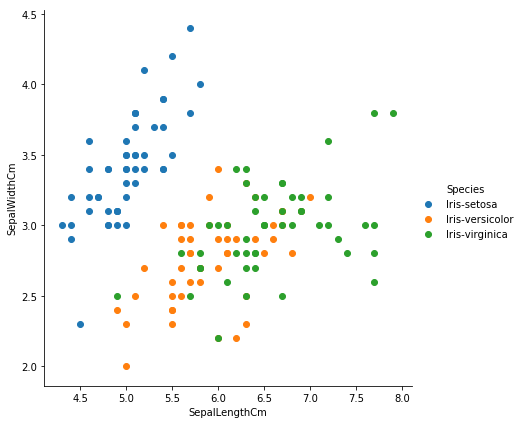

In [141]:
import seaborn as sns
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()



### Preprocessing Steps: Separating Independent Features and Dependant Feature(label)

In [142]:
# Preprocessing
# Let Separate Features and Target for machine Learning
# Step1 


features = list(data.columns[1:5])            # SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
label = data.columns[5]                      # Species

print('Features:',features)
print('Label:',target)

features = np.array(data.drop(['Id','Species'],axis=1)) 

label = np.array(data['Species'])                       


print(features.shape)
print(label.shape)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Label: Species
(150, 4)
(150,)


### Converting Response Variable 'Species' to numbers to train model and add column

In [143]:
# Read more: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(label)

# new col
data['EncodedSpecies'] = label

print('Classes:',le.classes_)
print('Response variable after encoding:',label)
print(data.tail(10))

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0   

### Classification Models

### 1: K-nearest neighbors (KNN) classification
- Pick a value for K.
- Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
- Use the most popular label value from the K nearest neighbors as the predicted label value for the unknown iris.

# Evaluation procedure #2: Train/test split

In [144]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.4)


In [145]:
print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


### How to check the best value for K?

# KNN with Train Test

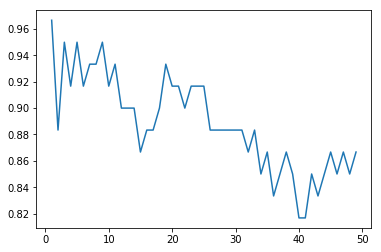

In [146]:

from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()


In [147]:
print('from above the best value is near:',9)

from above the best value is near: 9


In [148]:
knn = KNeighborsClassifier(n_neighbors=9)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.95

# Logistic Regression Model with Train Test split

In [149]:
logres = LogisticRegression()
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)

C:\Users\AM7\Anaconda3\envs\am7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AM7\Anaconda3\envs\am7\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9833333333333333